In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("data/csv/title_genres_v2.csv", delimiter=",")

In [3]:
df.columns

Index(['title', 'action', 'drama', 'fantasy', 'mystery', 'adventure',
       'excessive violence', 'horror', 'psychological drama',
       'supernatural drama', 'military', 'shounen', 'super power',
       'psychological', 'supernatural', 'thriller', 'crime fiction', 'police',
       'suspense', 'comedy', 'fighting-shounen', 'ganbatte', 'school',
       'demons', 'historical', 'parody', 'romance', 'game', 'seinen',
       'ghost stories', 'martial arts', 'slice of life', 'sentimental drama',
       'music', 'sports', 'ecchi', 'harem', 'mecha', 'vampire', 'gourmet',
       'avant garde', 'samurai', 'shoujo', 'nonsense-comedy', 'boys love',
       'girls love', 'kids', 'indefinite', 'josei', 'space', 'cars', 'hentai',
       'magical_girl', 'science fiction', 'erotic'],
      dtype='object')

In [4]:
genres = df.columns[1:]
genres

Index(['action', 'drama', 'fantasy', 'mystery', 'adventure',
       'excessive violence', 'horror', 'psychological drama',
       'supernatural drama', 'military', 'shounen', 'super power',
       'psychological', 'supernatural', 'thriller', 'crime fiction', 'police',
       'suspense', 'comedy', 'fighting-shounen', 'ganbatte', 'school',
       'demons', 'historical', 'parody', 'romance', 'game', 'seinen',
       'ghost stories', 'martial arts', 'slice of life', 'sentimental drama',
       'music', 'sports', 'ecchi', 'harem', 'mecha', 'vampire', 'gourmet',
       'avant garde', 'samurai', 'shoujo', 'nonsense-comedy', 'boys love',
       'girls love', 'kids', 'indefinite', 'josei', 'space', 'cars', 'hentai',
       'magical_girl', 'science fiction', 'erotic'],
      dtype='object')

In [5]:
df2 = pd.read_csv("data/csv/title_single_valued_attrs.csv", delimiter=',')

d:\ComputerScience\BachKhoa\IntroDataScience\Anime-Analysis\venv\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (14,15,16,17,18) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [6]:
df2.columns

Index(['title', 'romaji_title', 'english_title', 'mean_score_anilist',
       'weighted_score_anilist', 'popularity_anilist', 'favorites_anilist',
       'duration', 'status', 'episodes', 'source', 'season_season',
       'season_year', 'media_type', 'anilist_url', 'creator', 'prequel',
       'sequel', 'directors', 'status_completed_anilist',
       'status_planning_anilist', 'status_current_anilist',
       'status_paused_anilist', 'status_dropped_anilist', 'start_date',
       'end_date', 'mean_score_anisearch', 'popularity_anisearch',
       'favorites_anisearch', 'status_completed_anisearch',
       'status_planning_anisearch', 'status_current_anisearch',
       'status_paused_anisearch', 'status_dropped_anisearch',
       'number_scorer_anisearch', 'url', 'age', 'mean_score_kitsu',
       'favorite_count_kitsu', 'rating_rank_kitsu', 'user_count_kitsu',
       'mean_score_mal', 'popularity_mal', 'number_scorer_mal',
       'favorites_mal'],
      dtype='object')

In [7]:
len(df2.columns)

45

In [8]:
result = pd.concat([df, df2], axis=1)

In [9]:
result = result.loc[:,~result.columns.duplicated()]

In [10]:
result.head(5)

,title,action,drama,fantasy,mystery,adventure,excessive violence,horror,psychological drama,supernatural drama,...,url,age,mean_score_kitsu,favorite_count_kitsu,rating_rank_kitsu,user_count_kitsu,mean_score_mal,popularity_mal,number_scorer_mal,favorites_mal
0,attack on titan,1,1,1,1,1,1,1,1,1,...,"https://www.anisearch.com/anime/8219,attack-on...",r,8.49,6835.0,11.0,350376.0,8.51,3104669.0,2168959.0,137690.0
1,death note,0,1,1,1,0,0,1,1,1,...,"https://www.anisearch.com/anime/3633,death-note",r,8.36,5750.0,25.0,303639.0,8.63,3130472.0,2159771.0,142925.0
2,my hero academia,1,1,1,0,1,0,0,0,0,...,"https://www.anisearch.com/anime/10978,my-hero-...",pg,8.45,4349.0,15.0,325631.0,7.99,2396529.0,1624157.0,50118.0
3,demon slayer kimetsu no yaiba,1,1,1,0,1,1,1,0,0,...,"https://www.anisearch.com/anime/13658,demon-sl...",r,NaN,NaN,NaN,NaN,8.57,2069110.0,1380152.0,67452.0
4,hunter x hunter 2011,1,0,1,0,1,0,0,0,0,...,NaN,pg,8.43,6271.0,18.0,243790.0,9.06,2123271.0,1245840.0,164535.0


In [11]:
len(result)

30586

In [12]:
result.loc[:, "mean_score_anilist"] = result["mean_score_anilist"].apply(lambda x: x*10)

In [13]:
result["mean_score_anilist"]

0        8.5
1        8.4
2        7.9
3        8.5
4        9.0
        ... 
30581    NaN
30582    NaN
30583    NaN
30584    NaN
30585    NaN
Name: mean_score_anilist, Length: 30586, dtype: float64

## Box plot & Violin plot

### All genres

In [24]:
len(genres)

54

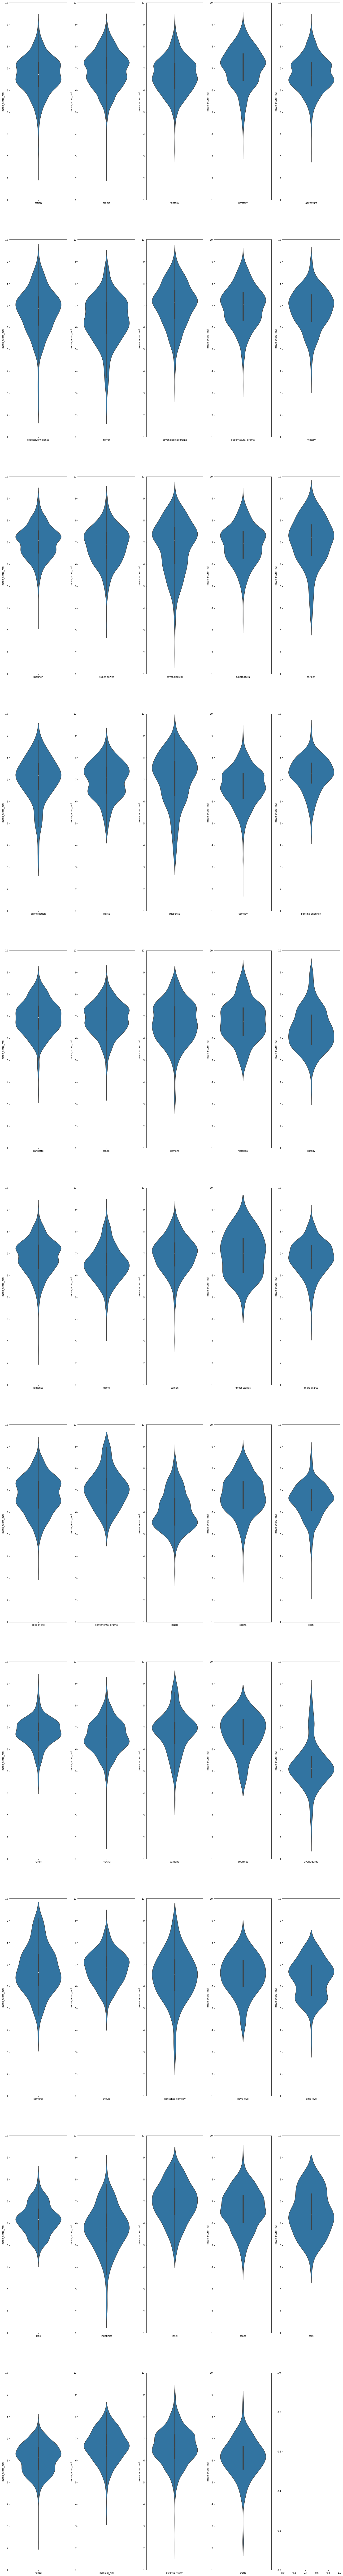

In [25]:
NUM_ROWS = 11
NUM_COLS = 5
fig, axs = plt.subplots(nrows=NUM_ROWS, ncols=NUM_COLS, figsize=(25, 200))
for idx, genre in enumerate(genres):
    anime = result[result[genre] == 1]
    row = idx // NUM_COLS
    col = idx % NUM_COLS
    ax = sns.violinplot(y=anime["mean_score_mal"], ax=axs[row][col])
    ax.set(ylim=(1, 10))
    ax.set_xticklabels([genre])

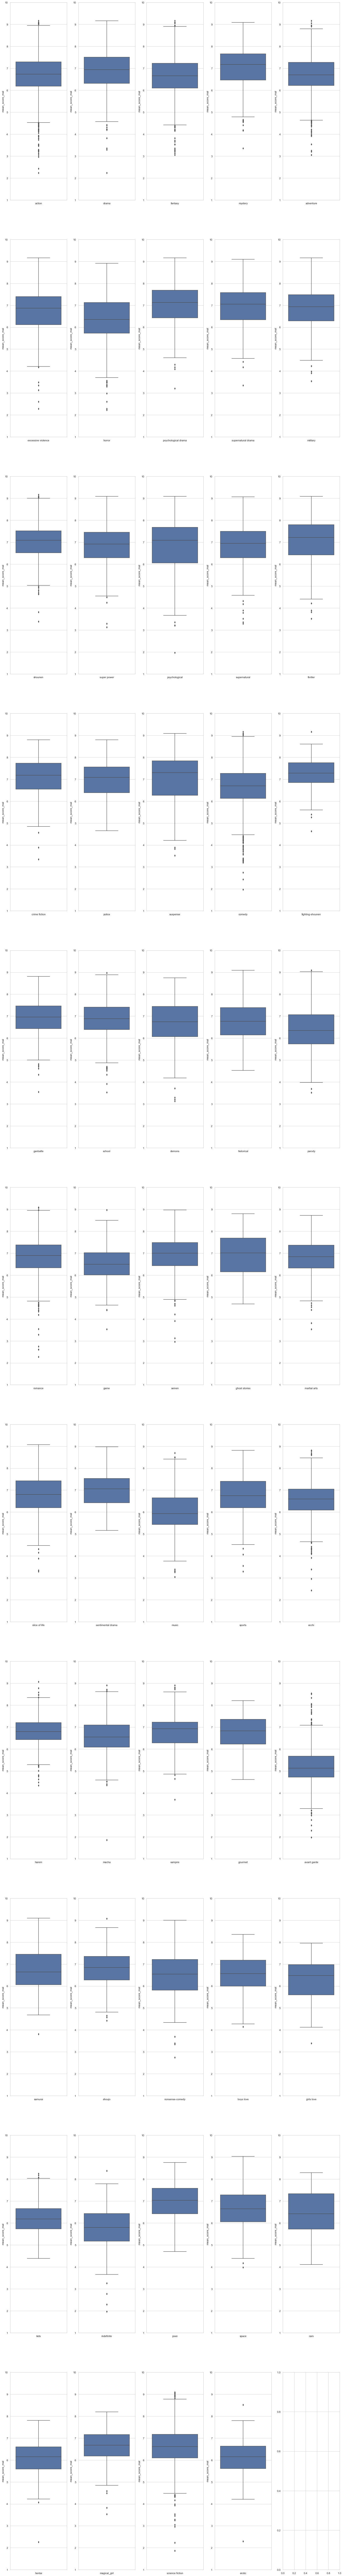

In [27]:
sns.set_theme()
sns.set_style("whitegrid")
NUM_ROWS = 11
NUM_COLS = 5
fig, axs = plt.subplots(nrows=NUM_ROWS, ncols=NUM_COLS, figsize=(25, 200))
for idx, genre in enumerate(genres):
    anime = result[result[genre] == 1]
    row = idx // NUM_COLS
    col = idx % NUM_COLS
    ax = sns.boxplot(y=anime["mean_score_mal"], ax=axs[row][col])
    ax.set(ylim=(1, 10))
    ax.set_xticklabels([genre])

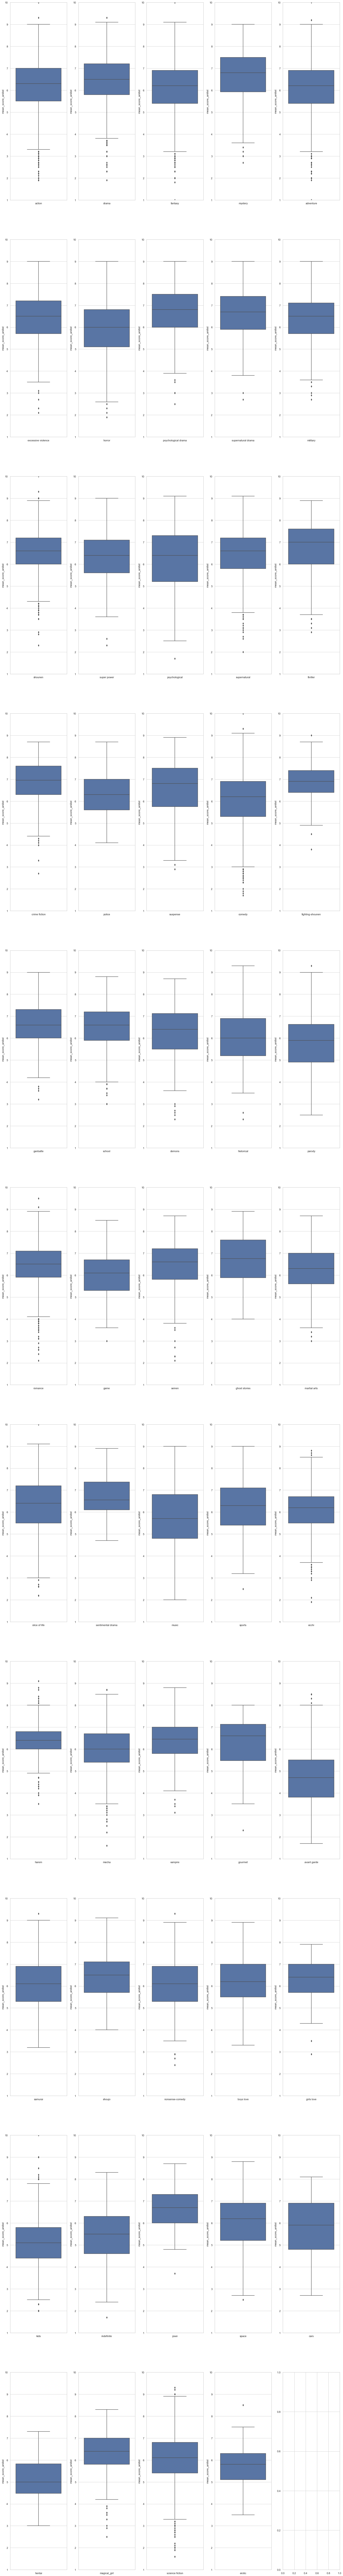

In [28]:
sns.set_theme()
sns.set_style("whitegrid")
NUM_ROWS = 11
NUM_COLS = 5
fig, axs = plt.subplots(nrows=NUM_ROWS, ncols=NUM_COLS, figsize=(25, 200))
for idx, genre in enumerate(genres):
    anime = result[result[genre] == 1]
    row = idx // NUM_COLS
    col = idx % NUM_COLS
    ax = sns.boxplot(y=anime["mean_score_anilist"], ax=axs[row][col])
    ax.set(ylim=(1, 10))
    ax.set_xticklabels([genre])

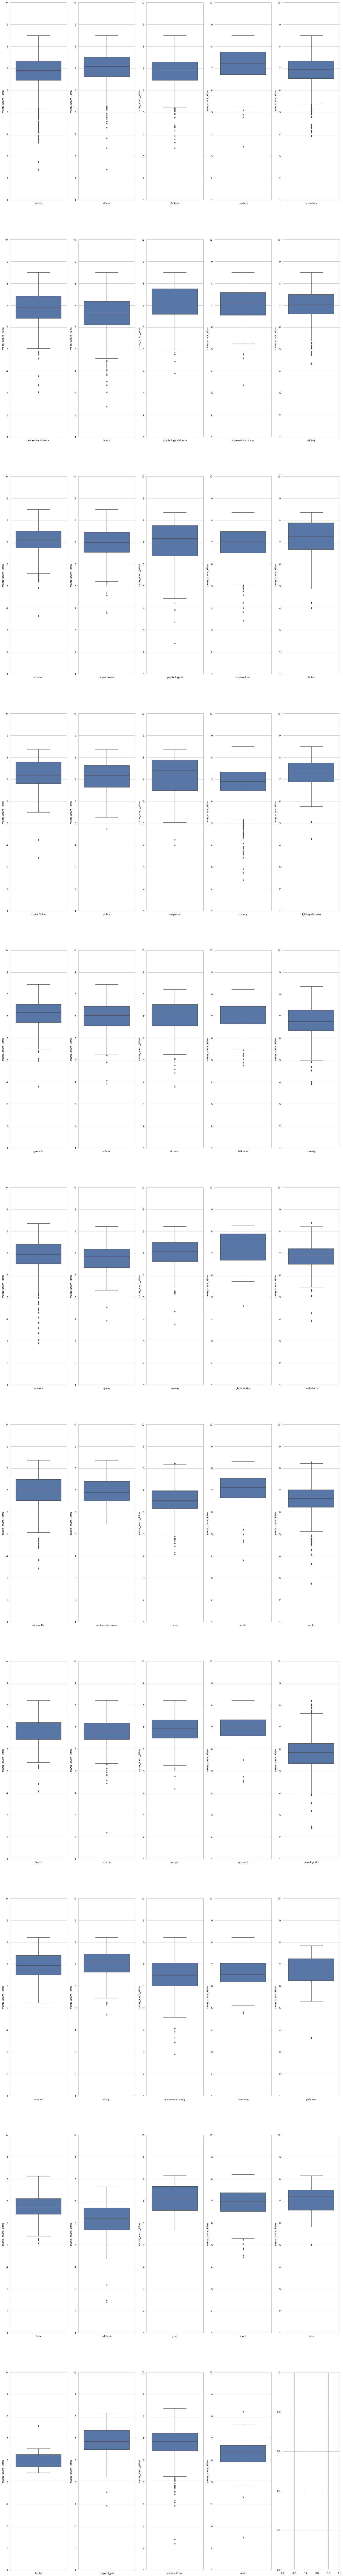

In [29]:
NUM_ROWS = 11
NUM_COLS = 5
fig, axs = plt.subplots(nrows=NUM_ROWS, ncols=NUM_COLS, figsize=(25, 200))
for idx, genre in enumerate(genres):
    anime = result[result[genre] == 1]
    row = idx // NUM_COLS
    col = idx % NUM_COLS
    ax = sns.boxplot(y=anime["mean_score_kitsu"], ax=axs[row][col])
    ax.set(ylim=(1, 10))
    ax.set_xticklabels([genre])

### Studios

In [14]:
df3 = pd.read_csv("data/csv/title_studios.csv", delimiter=",")

In [15]:
df3.head()

,title,wit,madhouse,bones,ufotable,a-1 pictures,pierrot,mappa,cloverworks,comix wave,...,ekakiya,earth design works,enjin productions,sek studios,super brain,kingyoiro,three-d,boyan pictures,composition,triopen
0,attack on titan,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,death note,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,my hero academia,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,demon slayer kimetsu no yaiba,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,hunter x hunter 2011,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [16]:
df3.columns

Index(['title', 'wit', 'madhouse', 'bones', 'ufotable', 'a-1 pictures',
       'pierrot', 'mappa', 'cloverworks', 'comix wave',
       ...
       'ekakiya', 'earth design works', 'enjin productions', 'sek studios',
       'super brain', 'kingyoiro', 'three-d', 'boyan pictures', 'composition',
       'triopen'],
      dtype='object', length=1204)

In [17]:
studios = df3.columns[1:]

In [33]:
to_be_dropped = []
for studio in studios:
    if len(df3[(df3[studio] == 1)]) <= 10:
        to_be_dropped.append(studio)
print(len(to_be_dropped))

101


In [19]:
df3.drop(to_be_dropped, axis=1, inplace=True)

In [24]:
df3.columns

Index(['title', 'wit', 'madhouse', 'bones', 'ufotable', 'a-1 pictures',
       'pierrot', 'mappa', 'cloverworks', 'comix wave',
       ...
       'breakbottle', 'selfish', 'rabbit gate', 'schoolzone', 'shinkuukan',
       'dream entertainment', 'acgt', 'anik',
       'shanghai foch and tv culture investment', 'at-2'],
      dtype='object', length=245)

In [25]:
studios = df3.columns[1:]

In [21]:
anime_studios = pd.concat([df3, df2], axis=1)

In [22]:
anime_studios = anime_studios.loc[:,~anime_studios.columns.duplicated()]

In [23]:
anime_studios.head()

,title,wit,madhouse,bones,ufotable,a-1 pictures,pierrot,mappa,cloverworks,comix wave,...,url,age,mean_score_kitsu,favorite_count_kitsu,rating_rank_kitsu,user_count_kitsu,mean_score_mal,popularity_mal,number_scorer_mal,favorites_mal
0,attack on titan,1,0,0,0,0,0,0,0,0,...,"https://www.anisearch.com/anime/8219,attack-on...",r,8.49,6835.0,11.0,350376.0,8.51,3104669.0,2168959.0,137690.0
1,death note,0,1,0,0,0,0,0,0,0,...,"https://www.anisearch.com/anime/3633,death-note",r,8.36,5750.0,25.0,303639.0,8.63,3130472.0,2159771.0,142925.0
2,my hero academia,0,0,1,0,0,0,0,0,0,...,"https://www.anisearch.com/anime/10978,my-hero-...",pg,8.45,4349.0,15.0,325631.0,7.99,2396529.0,1624157.0,50118.0
3,demon slayer kimetsu no yaiba,0,0,0,1,0,0,0,0,0,...,"https://www.anisearch.com/anime/13658,demon-sl...",r,NaN,NaN,NaN,NaN,8.57,2069110.0,1380152.0,67452.0
4,hunter x hunter 2011,0,1,0,0,0,0,0,0,0,...,NaN,pg,8.43,6271.0,18.0,243790.0,9.06,2123271.0,1245840.0,164535.0


In [32]:
len(anime_studios[anime_studios["jinni's animation"] == 1])

11

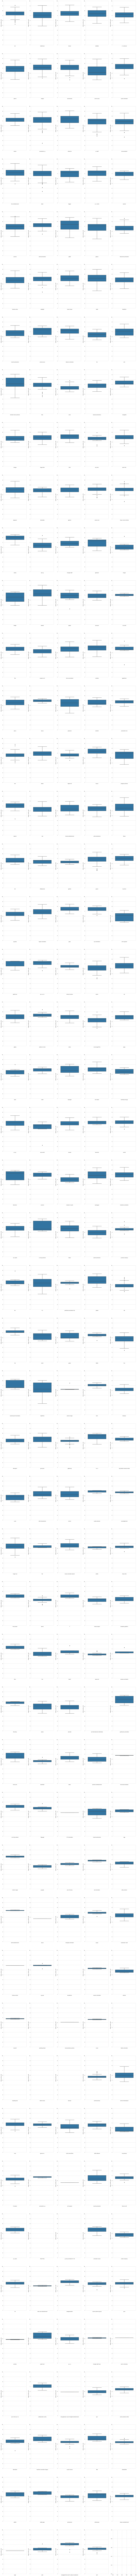

In [29]:
sns.set_style("whitegrid")
NUM_ROWS = 49
NUM_COLS = 5
fig, axs = plt.subplots(nrows=NUM_ROWS, ncols=NUM_COLS, figsize=(25, 500))
for idx, studio in enumerate(studios):
    anime = anime_studios[anime_studios[studio] == 1]
    row = idx // NUM_COLS
    col = idx % NUM_COLS
    ax = sns.boxplot(y=anime["mean_score_mal"], ax=axs[row][col])
    ax.set(ylim=(1, 10))
    ax.set_xticklabels([studio])